# `Annotations`

In [78]:
import pandas as pd
import duckdb

df = pd.read_csv("data/1900-census-immigrant-pop-metro.csv")

df


,City,State,Error,Total foreign born,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,...,Scotland,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other countries,Born at sea
0,Akron,Ohio,0,"7,127",4.0,NaN,NaN,1,190,9,...,187,1.0,2,200,258,NaN,226,8,NaN,6.0
1,Albany,New York,55,"17,718",3.0,39.0,4,13,106,13,...,395,1.0,1,65,64,21,80,4,3.0,15.0
2,Allegheny,Pennsylvania,0,"30,216",4.0,5.0,2,8,"3,929",10,...,"1,183",2.0,2,186,488,4,798,4,3.0,25.0
3,Allentown,Pennsylvania,3,"2,991",NaN,1.0,NaN,2,337,2,...,66,1.0,NaN,5,26,3,40,2,3.0,1.0
4,Altoona,Pennsylvania,65,"3,301",2.0,7.0,NaN,NaN,57,2,...,98,2.0,1,32,55,25,23,1,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Woonsocket,Rhode Island,5,"12,518",1.0,15.0,NaN,1,52,64,...,131,8.0,NaN,45,7,25,7,2,NaN,1.0
157,Worcester,Massachusetts,10,"37,652",1.0,192.0,11,12,103,20,...,714,8.0,2,"7,542",21,614,40,38,55.0,4.0
158,Yonkers,New York,65,"14,634",2.0,26.0,4,7,"1,032",6,...,572,2.0,2,289,75,18,45,19,4.0,9.0
159,York,Pennsylvania,5,"1,304",2.0,2.0,NaN,NaN,64,1,...,25,NaN,1,10,18,1,7,1,NaN,1.0


In [79]:
df.shape

(161, 50)

In [80]:
df.columns

Index(['City', 'State', 'Error', 'Total foreign born', 'Africa',
       'Asia (except China, Japan, and India)', 'Atlantic Islands',
       'Australia', 'Austria', 'Belgium', 'Bohemia', 'Canada (English)',
       'Canada (French)', 'Central America', 'China', 'Cuba', 'Denmark',
       'England', 'Europe (not otherwise specified)', 'Finland', 'France',
       'Germany', 'Greece', 'Holland', 'Hungary', 'India', 'Ireland', 'Italy',
       'Japan', 'Luxemburg', 'Mexico', 'Norway',
       'Pacific Islands (except Phillipine Islands)', 'Poland (Austrian)',
       'Poland (German)', 'Poland (Russian)', 'Poland (unknown)', 'Portugal',
       'Roumania', 'Russia', 'Scotland', 'South America', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'Wales',
       'West Indies (except Cuba and Puerto Rico)', 'Other countries',
       'Born at sea'],
      dtype='object')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 50 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   City                                         161 non-null    object 
 1   State                                        161 non-null    object 
 2   Error                                        161 non-null    int64  
 3   Total foreign born                           161 non-null    object 
 4   Africa                                       120 non-null    float64
 5   Asia (except China, Japan, and India)        133 non-null    float64
 6   Atlantic Islands                             99 non-null     object 
 7   Australia                                    136 non-null    object 
 8   Austria                                      161 non-null    object 
 9   Belgium                                      145 non-null    object 
 10  Bo

In [82]:
df

,City,State,Error,Total foreign born,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,...,Scotland,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other countries,Born at sea
0,Akron,Ohio,0,"7,127",4.0,NaN,NaN,1,190,9,...,187,1.0,2,200,258,NaN,226,8,NaN,6.0
1,Albany,New York,55,"17,718",3.0,39.0,4,13,106,13,...,395,1.0,1,65,64,21,80,4,3.0,15.0
2,Allegheny,Pennsylvania,0,"30,216",4.0,5.0,2,8,"3,929",10,...,"1,183",2.0,2,186,488,4,798,4,3.0,25.0
3,Allentown,Pennsylvania,3,"2,991",NaN,1.0,NaN,2,337,2,...,66,1.0,NaN,5,26,3,40,2,3.0,1.0
4,Altoona,Pennsylvania,65,"3,301",2.0,7.0,NaN,NaN,57,2,...,98,2.0,1,32,55,25,23,1,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Woonsocket,Rhode Island,5,"12,518",1.0,15.0,NaN,1,52,64,...,131,8.0,NaN,45,7,25,7,2,NaN,1.0
157,Worcester,Massachusetts,10,"37,652",1.0,192.0,11,12,103,20,...,714,8.0,2,"7,542",21,614,40,38,55.0,4.0
158,Yonkers,New York,65,"14,634",2.0,26.0,4,7,"1,032",6,...,572,2.0,2,289,75,18,45,19,4.0,9.0
159,York,Pennsylvania,5,"1,304",2.0,2.0,NaN,NaN,64,1,...,25,NaN,1,10,18,1,7,1,NaN,1.0


In [83]:
df = df.fillna("0")
df

,City,State,Error,Total foreign born,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,...,Scotland,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other countries,Born at sea
0,Akron,Ohio,0,"7,127",4.0,0,0,1,190,9,...,187,1.0,2,200,258,0,226,8,0,6.0
1,Albany,New York,55,"17,718",3.0,39.0,4,13,106,13,...,395,1.0,1,65,64,21,80,4,3.0,15.0
2,Allegheny,Pennsylvania,0,"30,216",4.0,5.0,2,8,"3,929",10,...,"1,183",2.0,2,186,488,4,798,4,3.0,25.0
3,Allentown,Pennsylvania,3,"2,991",0,1.0,0,2,337,2,...,66,1.0,0,5,26,3,40,2,3.0,1.0
4,Altoona,Pennsylvania,65,"3,301",2.0,7.0,0,0,57,2,...,98,2.0,1,32,55,25,23,1,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Woonsocket,Rhode Island,5,"12,518",1.0,15.0,0,1,52,64,...,131,8.0,0,45,7,25,7,2,0,1.0
157,Worcester,Massachusetts,10,"37,652",1.0,192.0,11,12,103,20,...,714,8.0,2,"7,542",21,614,40,38,55.0,4.0
158,Yonkers,New York,65,"14,634",2.0,26.0,4,7,"1,032",6,...,572,2.0,2,289,75,18,45,19,4.0,9.0
159,York,Pennsylvania,5,"1,304",2.0,2.0,0,0,64,1,...,25,0,1,10,18,1,7,1,0,1.0


In [84]:
df[["Denmark", "Sweden", "Norway", "Finland", "Total foreign born"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Denmark             161 non-null    object
 1   Sweden              161 non-null    object
 2   Norway              161 non-null    object
 3   Finland             161 non-null    object
 4   Total foreign born  161 non-null    object
dtypes: object(5)
memory usage: 6.4+ KB


In [85]:
columns_to_change_type = ["Denmark", "Sweden", "Norway", "Finland", "Total foreign born"]
df[columns_to_change_type].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Denmark             161 non-null    object
 1   Sweden              161 non-null    object
 2   Norway              161 non-null    object
 3   Finland             161 non-null    object
 4   Total foreign born  161 non-null    object
dtypes: object(5)
memory usage: 6.4+ KB


In [86]:
for column in columns_to_change_type:
    df[column] = df[column].str.replace(",", "").astype(int)

df[columns_to_change_type].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Denmark             161 non-null    int64
 1   Sweden              161 non-null    int64
 2   Norway              161 non-null    int64
 3   Finland             161 non-null    int64
 4   Total foreign born  161 non-null    int64
dtypes: int64(5)
memory usage: 6.4 KB


In [87]:
df.head()

,City,State,Error,Total foreign born,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,...,Scotland,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other countries,Born at sea
0,Akron,Ohio,0,7127,4.0,0,0,1,190,9,...,187,1.0,2,200,258,0,226,8,0,6.0
1,Albany,New York,55,17718,3.0,39.0,4,13,106,13,...,395,1.0,1,65,64,21,80,4,3.0,15.0
2,Allegheny,Pennsylvania,0,30216,4.0,5.0,2,8,"3,929",10,...,"1,183",2.0,2,186,488,4,798,4,3.0,25.0
3,Allentown,Pennsylvania,3,2991,0,1.0,0,2,337,2,...,66,1.0,0,5,26,3,40,2,3.0,1.0
4,Altoona,Pennsylvania,65,3301,2.0,7.0,0,0,57,2,...,98,2.0,1,32,55,25,23,1,8.0,4.0


In [90]:

df_nordic = duckdb.query("""--sql
                WITH nordic AS (
                    FROM df
                        SELECT
                            state,
                            SUM("Total foreign born") AS "Total Foreigners",
                            SUM(sweden) AS Swedes,
                            SUM(norway) AS Norwegians,
                            SUM(denmark) AS Danes,
                            SUM(finland) AS Fins
                        GROUP BY state
                )
                FROM nordic n SELECT *, n.swedes + n.norwegians + n.danes + n.fins AS Nordic
                    order by Nordic
                    desc
                """).df()

df_nordic

,State,Total Foreigners,Swedes,Norwegians,Danes,Fins,Nordic
0,Illinois,627465.0,57158.0,22300.0,10374.0,447.0,90279.0
1,Minnesota,128823.0,34984.0,17087.0,2975.0,1101.0,56147.0
2,New York,1521931.0,29961.0,11752.0,6186.0,3764.0,51663.0
3,Massachusetts,567170.0,21971.0,2366.0,1451.0,3154.0,28942.0
4,Wisconsin,124230.0,4034.0,6485.0,4024.0,405.0,14948.0
5,California,160828.0,7223.0,2729.0,3082.0,986.0,14020.0
6,Washington,40868.0,5150.0,3686.0,1193.0,603.0,10632.0
7,Pennsylvania,514506.0,5986.0,861.0,1210.0,378.0,8435.0
8,Nebraska,34456.0,4864.0,457.0,2888.0,11.0,8220.0
9,Connecticut,101502.0,6647.0,273.0,1144.0,41.0,8105.0


## Plotting

In [93]:
top_3_nordic = df_nordic.drop(["Nordic", "Total Foreigners"], axis=1).set_index("State").head(3)
top_3_nordic

,Swedes,Norwegians,Danes,Fins
State,,,,
Illinois,57158.0,22300.0,10374.0,447.0
Minnesota,34984.0,17087.0,2975.0,1101.0
New York,29961.0,11752.0,6186.0,3764.0


<Axes: xlabel='State'>

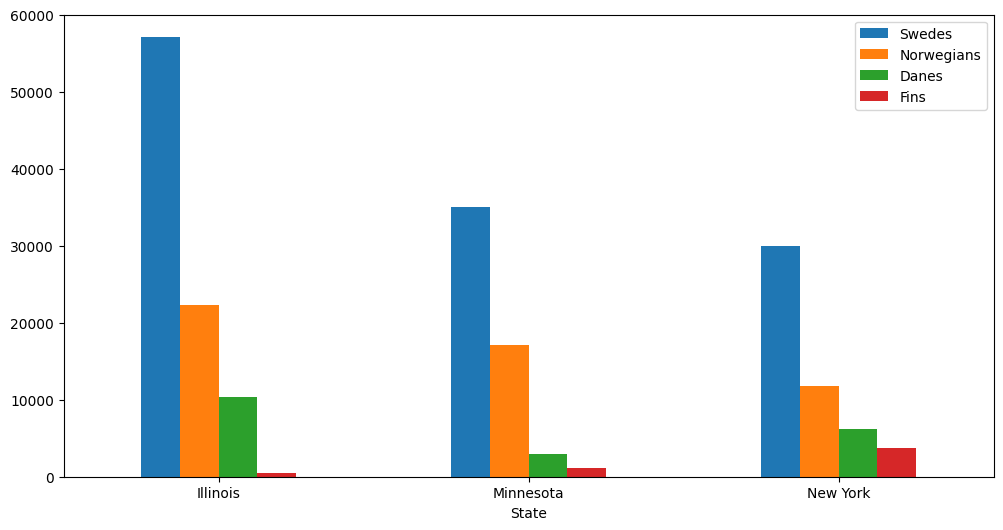

In [109]:
import matplotlib.pyplot as plt

def nordic_plot():
    ax = top_3_nordic.plot(kind="bar", figsize=(12,6))
    ax.set_xticklabels(top_3_nordic.index, rotation = 0)

    fig = ax.get_figure()

    return fig, ax

_, ax = nordic_plot()

ax

In [111]:
ax.containers

[<BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>,
 <BarContainer object of 3 artists>]

In [113]:
ax.containers[0][0]

In [116]:
ax.containers[0][0].get_height(), ax.containers[0][0].get_x()

(np.float64(57158.0), np.float64(-0.25))

## Annotate with arrows

Text(0.6, 45000, 'Swedes')

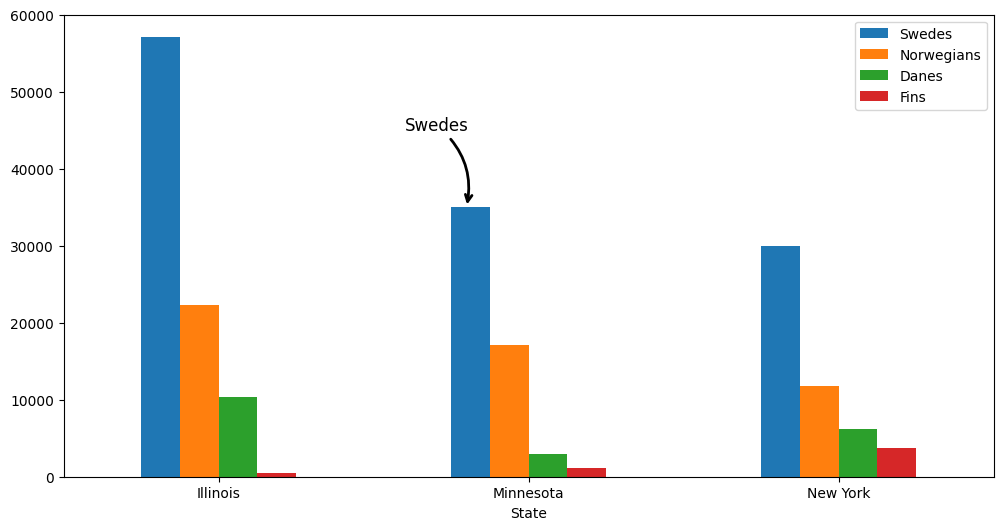

In [156]:
swedes_bars, norwegians_bars, danes_bars, fins_bars = ax.containers

fig, ax = nordic_plot()

arrowprops = dict(arrowstyle = "->", connectionstyle="arc3, rad=-.3", linewidth=2)
ax.annotate(text= "Swedes", xy = (.8, 35000), arrowprops=arrowprops, xytext= (.6,45000), fontsize = 12)

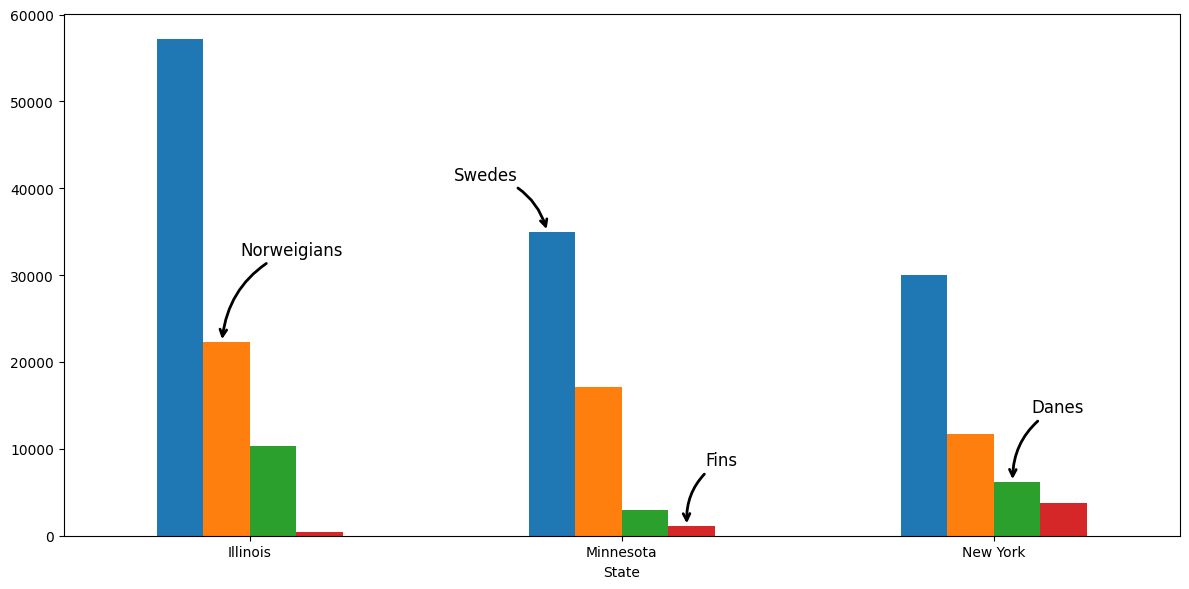

In [178]:
swedes_bars, norwegians_bars, danes_bars, fins_bars = ax.containers

fig, ax = nordic_plot()

def annotate_nordic(bar_artist, text, x_offset=0.3, y_offset=5000):
    xy = (bar_artist.get_x(), bar_artist.get_height())

    rad = -0.3 if x_offset < 0 else 0.3

    arrowprops = dict(arrowstyle = "->", connectionstyle=f"arc3, rad={rad}", linewidth=2)
    
    ax.annotate(
        text= text, 
        xy = (xy[0] + 0.05, xy[1]), 
        xytext= (xy[0] + x_offset, xy[1] + y_offset),
        arrowprops=arrowprops,
        fontsize = 12
    )

annotate_nordic(swedes_bars[1], "Swedes", x_offset=-0.2, y_offset=6000)
annotate_nordic(norwegians_bars[0], "Norweigians", x_offset=0.1, y_offset=10000)
annotate_nordic(danes_bars[2], "Danes", x_offset=0.1, y_offset=8000)
annotate_nordic(fins_bars[1], "Fins", x_offset=0.1, y_offset=7000)

ax.legend().remove()
fig.tight_layout()